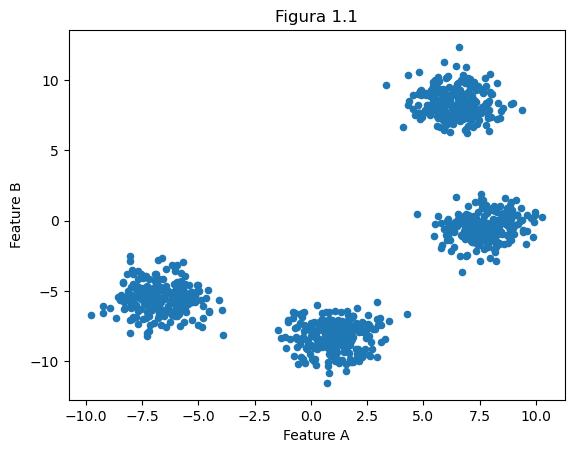

In [34]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

#importamos los datos para los algoritmos
data = np.load('MeanShift/X.npy')
clase = np.load('MeanShift/_.npy')

#graficamos cada uno de los puntos
#Nota: no esta siendo aplicado ningun algoritmo de clasificacion
fig = plt.figure()
plt.scatter(data[:, 0], data[:, 1], s=20)
plt.xlabel('Feature A')
plt.ylabel('Feature B')
plt.title('Figura 1.1')
plt.show()

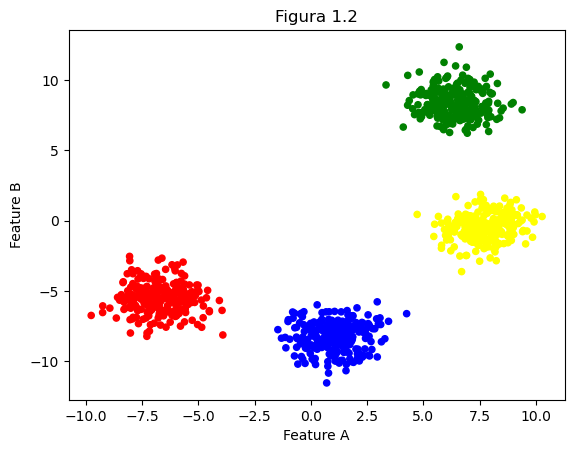

In [35]:
#Ahora los puntos graficados tendran el color de su respectiva clase

#guardamos dentro de un arreglo los colores que deberia tomar cada punto
#por ejemplo si su clase es 2, se lo asocia al color blue
Color=['red','green','blue', 'yellow']
aColor=[]

for i in clase:
    aColor.append(Color[i])

#graficamos
plt.scatter(data[:, 0], data[:, 1], c=aColor, s=20)
plt.xlabel('Feature A')
plt.ylabel('Feature B')
plt.title('Figura 1.2')
plt.show()

el ancho de banda utilizado es de: 2.4448214515337323
centroide 0 = [ 7.73966687 -0.52476868]
centroide 1 = [ 1.03098522 -8.2393691 ]
centroide 2 = [6.42008245 8.27196774]
centroide 3 = [-6.68139421 -5.4347395 ]


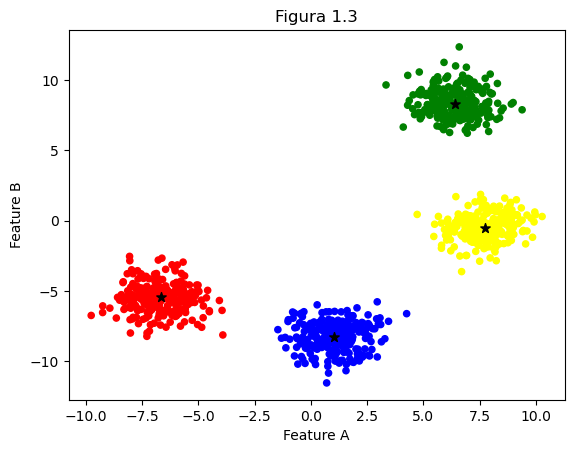

In [40]:
#utilizamos el algoritmo de meanshift

#Nota: el algoritmo de meanshift utiliza un badwidth (ancho de banda), esto es el rango en el que se consultaran los datos
#mientras mayor sea, mayor sera la cantidad de elementos por cluster.

#Para determinar el ancho de banda apropiado utilizamos la funcion estimate_bandwith, la cual la trabajaremos en el quantil 0.2
AB = estimate_bandwidth(data, quantile=0.2)
print("el ancho de banda utilizado es de:",AB)

#aplicamos el algoritmo de meanshift y le introducimos nuestros datos
MShift = MeanShift(bandwidth=AB)
MShift.fit(data)

#obtenemos los centroides
centroides = MShift.cluster_centers_

for i in range(len(centroides)):
    print("centroide",i,"=",centroides[i])

#graficamos
plt.scatter(data[:, 0], data[:, 1], c=aColor, s=20)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='*', c="black", s=50)
plt.xlabel('Feature A')
plt.ylabel('Feature B')
plt.title('Figura 1.3')
plt.show()

In [37]:
Txt = '''el algoritmo de Meanshift lo asocio con el siguiente arreglo de etiquetas, En donde se puede
observar que el data puede tener la etiqueta 0, 1, 2 o 3, esto nos indica el color que tiene dicho punto. Sin embargo como 
es no supervisado no hereda la asociacion original en la que se establece que el cluster 0 es rojo, el cluster 1 es de 
color verde, el 2 azul y el 3 amarillo, por lo que se debera hacer un ajuste para realizar predicciones. El arreglo de etiquetas es la 
siguiente:\n 
'''
print("Para el dataset de",len(MShift.labels_),"elementos,",Txt)
print(MShift.labels_)

Para el dataset de 1000 elementos, el algoritmo de Meanshift lo asocio con el siguiente arreglo de etiquetas, En donde se puede
observar que el data puede tener la etiqueta 0, 1, 2 o 3, esto nos indica el color que tiene dicho punto. Sin embargo como 
es no supervisado no hereda la asociacion original en la que se establece que el cluster 0 es rojo, el cluster 1 es de 
color verde, el 2 azul y el 3 amarillo, por lo que se debera hacer un ajuste para realizar predicciones. El arreglo de etiquetas es la 
siguiente:
 

[2 1 1 0 0 1 1 2 3 0 1 3 2 3 2 3 0 3 0 1 3 0 0 2 1 3 2 3 0 3 3 2 2 0 1 3 1
 3 1 1 2 2 0 2 0 3 3 3 2 0 1 2 2 0 1 0 3 0 3 2 2 3 0 1 3 3 1 1 0 2 1 0 0 1
 2 0 0 0 2 0 2 2 2 0 2 0 2 3 3 1 3 1 0 2 1 3 2 1 1 3 3 2 2 0 0 3 2 1 0 1 3
 1 3 2 2 1 3 2 1 3 0 1 2 3 1 1 0 0 2 2 2 0 0 0 1 0 2 1 0 2 3 0 2 3 3 0 1 2
 1 0 1 2 2 3 0 3 3 2 1 3 3 1 2 1 1 2 0 3 3 0 3 2 3 2 1 1 3 3 1 2 2 3 0 3 2
 2 2 0 0 1 0 1 0 3 3 3 2 1 1 0 3 0 0 3 0 0 2 1 1 0 0 3 0 1 1 3 0 2 3 3 1 1
 3 3 2 0 0 1 3 1 0 1 1 2 3 1

[-7. -6.] pertenece a la clase red
[ 1.5 -6.5] pertenece a la clase blue
[7.9 0.5] pertenece a la clase yellow
[ 5.5 10. ] pertenece a la clase green


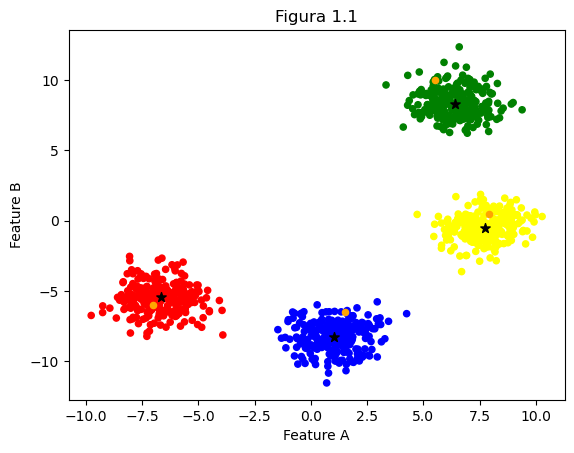

In [39]:
#datos de prueba
test = np.array([[-7,-6],[1.5,-6.5],[7.9,0.5],[5.5,10]])

#Nota: como Kmeans es no supervizado, se debe asociar cada color al cluster correspondiente
#en este caso se puede ver que el cluster con centro (7.7,-0.5) pertenece a la clase amarillo (cluster 0),
#(1, -8.2) pertenece a la clase azul (cluster 1), (6.4, 8.3) pertenece a la clase verde (cluster 2) y 
#el cluster con centro (-6.7, -5.4) pertenece a la clase roja (cluster 3)


#Asociamos cada color a su respectiva clase
Color2 = ['yellow','blue','green', 'red']

#predecimos a que clase corresponden mediante meanshift los valores de prueba y mostramos por pantalla
predict = MShift.predict(test)
for i in range(len(predict)):
    print(test[i],"pertenece a la clase", Color2[predict[i]])

#graficamos
plt.scatter(data[:, 0], data[:, 1], c=aColor, s=20)
plt.scatter(test[:, 0], test[:, 1], c="orange",s=20)
plt.scatter(centroides[:, 0], centroides[:, 1], marker='*', c="black", s=50)
plt.xlabel('Feature A')
plt.ylabel('Feature B')
plt.title('Figura 1.1')
plt.show()